In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movie = pd.read_csv("C:\\Users\\ishita mishra\\Downloads\\movie_data\\movies.csv")
tags = pd.read_csv("C:\\Users\\ishita mishra\\Downloads\\movie_data\\tags.csv")

In [3]:
movie.shape

(9742, 3)

In [4]:
ratings = pd.read_csv("C:\\Users\\ishita mishra\\Downloads\\movie_data\\ratings.csv")
links = pd.read_csv("C:\\Users\\ishita mishra\\Downloads\\movie_data\\links.csv")

In [5]:
ratings.shape

(100836, 4)

In [6]:
ratings['userId'].nunique()

610

In [7]:
movie_ratings_count = ratings.groupby('movieId')['rating'].count()
movie_ratings_count

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

In [8]:
max_ratings_movie_id = movie_ratings_count.idxmax()
max_ratings_movie_id

356

In [9]:
max_ratings_movie_title = movie.loc[movie['movieId'] == max_ratings_movie_id, 'title'].values[0]
max_ratings_movie_title

'Forrest Gump (1994)'

In [10]:
matrix_movie_id = movie.loc[movie['title'] == 'Matrix, The (1999)', 'movieId'].values[0]
matrix_movie_id

2571

In [11]:
matrix_tags = tags[tags['movieId'] == matrix_movie_id]
matrix_tags

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [12]:
terminator_movie_id = movie.loc[movie['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].values[0]
terminator_movie_id

589

In [13]:
terminator_ratings = ratings[ratings['movieId'] == terminator_movie_id]
terminator_ratings

,userId,movieId,rating,timestamp
552,5,589,3.0,847435258
806,6,589,3.0,845553317
886,7,589,2.5,1106635940
1286,11,589,4.0,902154266
1449,15,589,5.0,1510572012
...,...,...,...,...
97461,606,589,3.5,1171325855
98514,607,589,4.0,963078960
98786,608,589,3.0,1117415154
99519,609,589,3.0,847220990


In [14]:
average_rating = terminator_ratings['rating'].mean()
average_rating

3.970982142857143

In [15]:
fight_club_movie_id = movie.loc[movie['title'] == 'Fight Club (1999)', 'movieId'].values[0]
fight_club_movie_id

2959

In [16]:
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]
fight_club_ratings

,userId,movieId,rating,timestamp
192,1,2959,5.0,964983282
458,4,2959,2.0,945078528
1134,10,2959,0.5,1455356582
1479,15,2959,2.5,1510571747
1635,16,2959,3.5,1377476874
...,...,...,...,...
95893,601,2959,5.0,1441639461
96788,603,2959,4.0,963176105
97835,606,2959,5.0,1171231517
99107,608,2959,5.0,1117336631


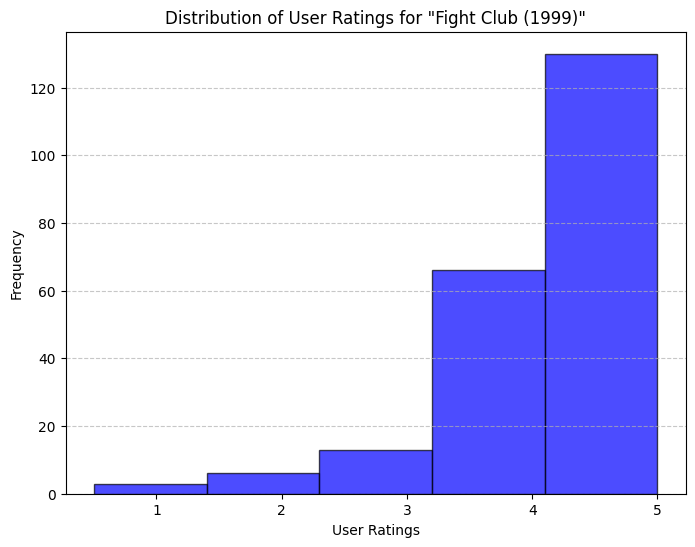

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(fight_club_ratings['rating'], bins=5, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('User Ratings')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [18]:
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings

movieId rating          
              count      mean
0          1    215  3.920930
1          2    110  3.431818
2          3     52  3.259615
3          4      7  2.357143
4          5     49  3.071429
...      ...    ...       ...
9719  193581      1  4.000000
9720  193583      1  3.500000
9721  193585      1  3.500000
9722  193587      1  3.500000
9723  193609      1  4.000000

[9724 rows x 3 columns]

In [19]:
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']
grouped_ratings

,movieId,rating_count,rating_mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [20]:
merged_df = pd.merge(movie, grouped_ratings, on='movieId', how='inner')
merged_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [21]:
filtered_df = merged_df[merged_df['rating_count'] > 50]
filtered_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [22]:
most_popular_movie = filtered_df.loc[filtered_df['rating_mean'].idxmax()]
most_popular_movie

movieId                                      318
title           Shawshank Redemption, The (1994)
genres                               Crime|Drama
rating_count                                 317
rating_mean                             4.429022
Name: 277, dtype: object

In [23]:
top_movies_by_ratings = filtered_df.sort_values(by='rating_count', ascending=False).head(5)
top_movies_by_ratings


,movieId,title,genres,rating_count,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [24]:
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]
sci_fi_movies

,movieId,title,genres,rating_count,rating_mean
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051
133,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
176,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043
...,...,...,...,...,...
7675,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565
7749,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [25]:
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)
sorted_sci_fi_movies

,movieId,title,genres,rating_count,rating_mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [26]:
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]
third_most_popular_sci_fi_movie

movieId                                      480
title                       Jurassic Park (1993)
genres          Action|Adventure|Sci-Fi|Thriller
rating_count                                 238
rating_mean                                 3.75
Name: 418, dtype: object

In [28]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    try:
        id = str(int(imdbId))
        n_zeroes = 7 - len(id)
        new_id = "0" * n_zeroes + id
        URL = f"https://www.imdb.com/title/tt{new_id}/"
        request_header = {
            'Content-Type': 'text/html; charset=UTF-8',
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
            'Accept-Encoding': 'gzip, deflate, br'
        }
        response = requests.get(URL, headers=request_header)
        response.raise_for_status()  # Raise an HTTPError for bad responses
        soup = BeautifulSoup(response.text, 'html.parser')
        imdb_rating = soup.find('span', attrs={'data-testid': 'ratingValue'})
        return imdb_rating.text if imdb_rating else np.nan
    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")
        return np.nan

# Example usage:
imdb_rating = scrapper("0114709")
print("IMDb Rating:", imdb_rating)

IMDb Rating: nan


In [29]:
merged_df = pd.merge(links, movie, on='movieId', how='inner')

In [30]:
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi', case=False, na=False)]
sci_fi_movies

,movieId,imdbId,tmdbId,title,genres
23,24,114168,12665.0,Powder (1995),Drama|Sci-Fi
28,29,112682,902.0,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
31,32,114746,63.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
59,66,116839,11525.0,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
68,76,114367,9102.0,Screamers (1995),Action|Sci-Fi|Thriller
...,...,...,...,...,...
9713,188301,5095030,363088.0,Ant-Man and the Wasp (2018),Action|Adventure|Comedy|Fantasy|Sci-Fi
9722,189547,1665744,111196.0,Iron Soldier (2010),Action|Sci-Fi
9724,190183,4073790,445651.0,The Darkest Minds (2018),Sci-Fi|Thriller
9731,191005,5805470,432985.0,Gintama (2017),Action|Adventure|Comedy|Sci-Fi


In [ ]:
sci_fi_movies['imdb_rating'] = sci_fi_movies['movieId'].apply(scrapper)
sci_fi_movies['imdb_rating']

Error: HTTPSConnectionPool(host='www.imdb.com', port=443): Max retries exceeded with url: /title/tt0000103/ (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EF074E7250>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Error: HTTPSConnectionPool(host='www.imdb.com', port=443): Max retries exceeded with url: /title/tt0000332/ (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EF07249450>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))
Error: 504 Server Error: Gateway Time-out for url: https://www.imdb.com/title/tt0000379/
Error: HTTPSConnectionPool(host='www.imdb.com', port=443): Max retries exceeded with url: /title/tt0000788/ (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EF07458750>: Failed to establish a new c

In [ ]:
highest_rated_movieId_sci_fi = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax(), 'movieId']